# Orientation of a non-linear molecule using strong THz fields

Simulate orientation of propylene oxide molecule produced by a strong THz filed of the kind reported in ["Optical generation of single-cycle 10 MW peak power 100 GHz waves", X. Wu, et al., Opt. Express 24, 21059 (2016)](https://doi.org/10.1364/OE.24.021059)

In [1]:
from field_free import field_free
from stark import dipole_me_matrix, field_free_matrix
from thz_field import thz_field
from tdse import propagate
from constants import DEBYE_TIMES_VOLTS_PER_CM_INTO_INVPS
import propylene_oxide

import numpy as np
from scipy.interpolate import RegularGridInterpolator
from scipy.spatial.transform import Rotation
import matplotlib.pyplot as plt

### Molecular data for propylene oxide molecule

In [7]:
rot_a = propylene_oxide.rot_a
rot_b = propylene_oxide.rot_b
rot_c = propylene_oxide.rot_c

# dipole moment in Debye
dipole_debye_abc = np.copy(propylene_oxide.dipole_expt_deb)

print(propylene_oxide.__doc__)
print("Rotational constants (MHz):", rot_a, rot_b, rot_c)
print("(a, b, c) principal-frame components of dipole moment (Debye):", dipole_debye_abc)

Molecular data for propylene oxide molecule

Rotational constants (in MHz):
    - spectroscopic measurements, see https://doi.org/10.1016/0022-2852(77)90268-5 and https://doi.org/10.1126/science.aae0328
Dipole moment:
    - calculated (in Debye), using CCSD(T)/aug-cc-pVTZ in the frozen-core approximation
    - measured (in Debye), see https://doi.org/10.1063/1.1743645

Rotational constants (MHz): 18023.89 6682.14 5951.39
(a, b, c) principal-frame components of dipole moment (Debye): [0.95 1.67 0.56]


### Field-free rotational energies and wavefunctions

In [8]:
max_j = 6

rot_enr = {}
rot_vec = {}
rot_assignment = {}
rot_func_on_grid = {}

for j in range(max_j + 1):
    abc_axes, rot_enr[j], rot_vec[j], rot_assignment[j], grid, rot_func_on_grid[j] = (
        field_free(j, rot_a, rot_b, rot_c)
    )

print("(a, b, c) principal-frame axes correspond to molecular-frame axes:", abc_axes)
dipole_debye_xyz = [dipole_debye_abc['xyz'.index(cart)] for cart in abc_axes]
print("(x, y, z) molecular-frame components of dipole moment:", dipole_debye_xyz)

(a, b, c) principal-frame axes correspond to molecular-frame axes: ('z', 'y', 'x')
(x, y, z) molecular-frame components of dipole moment: [0.56, 1.67, 0.95]


Print rotational energies and assignments

In [9]:
print("Rotational energies\n# (J, ka, kc)  E (MHz)")
for j in rot_enr.keys():
    for i, (e, (j, ka, kc)) in enumerate(zip(rot_enr[j], rot_assignment[j])):
        print(i, (j, ka, kc), e)

Rotational energies
# (J, ka, kc)  E (MHz)
0 (0, 0, 0) 0.0
0 (1, 0, 1) 12633.529999999999
1 (1, 1, 1) 23975.28
2 (1, 1, 0) 24706.03
0 (2, 0, 2) 37866.405302775536
1 (2, 1, 2) 48511.58999999999
2 (2, 1, 1) 50703.84
3 (2, 2, 1) 84729.08999999998
4 (2, 2, 0) 84763.27469722443
0 (3, 0, 3) 75630.75199711006
1 (3, 1, 3) 85295.16754314957
2 (3, 1, 0) 89678.66673962174
3 (3, 2, 2) 122629.68
4 (3, 2, 1) 122800.10800288993
5 (3, 3, 1) 181186.19245685043
6 (3, 3, 0) 181187.19326037826
0 (4, 0, 4) 125827.44703018782
1 (4, 1, 4) 134302.32304557206
2 (4, 1, 1) 141602.82597018147
3 (4, 2, 3) 173137.19753037777
4 (4, 2, 0) 173645.02619826462
5 (4, 3, 2) 231785.77695442789
6 (4, 3, 3) 231792.77402981845
7 (4, 4, 1) 313675.90246962226
8 (4, 4, 0) 313675.9267715476
0 (5, 0, 5) 188332.93397005636
1 (5, 1, 5) 195503.68732116293
2 (5, 1, 0) 206437.01544305246
3 (5, 2, 4) 236228.89590832658
4 (5, 2, 1) 237398.69339864876
5 (5, 3, 3) 295060.7582166728
6 (5, 3, 4) 295088.6795613417
7 (5, 4, 2) 376919.504091673

### Rotational matrix elements of dipole moment operator

In [10]:
# dipole matrix elelements
dipole_matrix = dipole_me_matrix(max_j, rot_vec, dipole_debye_xyz, linear=False)

# field-free Hamiltonian - diagonal matrix with rotational energies
h0_matrix, assignment = field_free_matrix(max_j, rot_enr, rot_assignment)

Print assignments of rotational states, including the $m$-degeneracy

In [11]:
print("Rotational energies\n# (J, ka, kc, m)  E (MHz)")
for i, (j, ka, kc, m) in enumerate(assignment):
    print(i, (j, ka, kc, m), h0_matrix[i, i])

Rotational energies
# (J, ka, kc, m)  E (MHz)
0 (0, 0, 0, 0) 0.0
1 (1, 0, 1, -1) 12633.529999999999
2 (1, 0, 1, 0) 12633.529999999999
3 (1, 0, 1, 1) 12633.529999999999
4 (1, 1, 1, -1) 23975.28
5 (1, 1, 1, 0) 23975.28
6 (1, 1, 1, 1) 23975.28
7 (1, 1, 0, -1) 24706.03
8 (1, 1, 0, 0) 24706.03
9 (1, 1, 0, 1) 24706.03
10 (2, 0, 2, -2) 37866.405302775536
11 (2, 0, 2, -1) 37866.405302775536
12 (2, 0, 2, 0) 37866.405302775536
13 (2, 0, 2, 1) 37866.405302775536
14 (2, 0, 2, 2) 37866.405302775536
15 (2, 1, 2, -2) 48511.58999999999
16 (2, 1, 2, -1) 48511.58999999999
17 (2, 1, 2, 0) 48511.58999999999
18 (2, 1, 2, 1) 48511.58999999999
19 (2, 1, 2, 2) 48511.58999999999
20 (2, 1, 1, -2) 50703.84
21 (2, 1, 1, -1) 50703.84
22 (2, 1, 1, 0) 50703.84
23 (2, 1, 1, 1) 50703.84
24 (2, 1, 1, 2) 50703.84
25 (2, 2, 1, -2) 84729.08999999998
26 (2, 2, 1, -1) 84729.08999999998
27 (2, 2, 1, 0) 84729.08999999998
28 (2, 2, 1, 1) 84729.08999999998
29 (2, 2, 1, 2) 84729.08999999998
30 (2, 2, 0, -2) 84763.27469722443
31 

### Define THz field

Use field provided by `thz_field` module, which is a digitized version of the Figure 4 in ["Optical generation of single-cycle 10 MW peak power 100 GHz waves", X. Wu, et al., Opt. Express 24, 21059 (2016)](https://doi.org/10.1364/OE.24.021059)

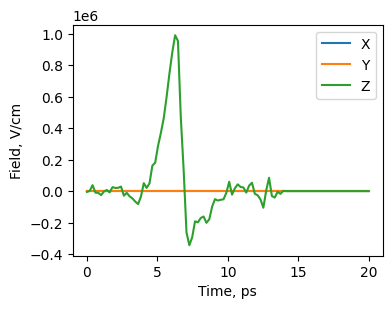

In [12]:
# field, in V/cm, as a function of time, in picoseconds
field = lambda time: np.array([0, 0, thz_field(time, peak_field=100e4)])

time = np.linspace(0, 20, 100)
plt.figure(figsize=(4, 3))
plt.plot(time, np.array([field(t) for t in time]), label=["X", "Y", "Z"])
plt.xlabel("Time, ps")
plt.ylabel("Field, V/cm")
plt.legend()
plt.show()

### Propagate

Solve time-dependent Schrödinger equation with THz field. Molecule initially in the ground rotational state.

In [13]:
# convert field-free Hamiltonian from MHz to 1/ps
h0_matrix_invps = h0_matrix * 1e-6

# convert dipole matrix elelements to units cm/(V*ps)
# to make sure that when it is multiplied with field in V/cm, the final units will be 1/ps
dipole_matrix_invps = dipole_matrix * DEBYE_TIMES_VOLTS_PER_CM_INTO_INVPS

# solve TDSE

# initial population - ground state only
coefs = np.zeros(len(h0_matrix_invps))
coefs[0] = 1.0

coefs_time = propagate(
    start_time=0.0,
    end_time=200,
    time_step=0.01,
    field=field,
    field_free_matrix=h0_matrix_invps,
    dipole_matrix=dipole_matrix_invps,
    initial_coefs=coefs,
    on_update=lambda i, t, c: (  # print population of state no. 0 at each 100th timestep
        print(
            t.round(2),
            np.abs(c[0]) ** 2,
        )
        if i % 100 == 0
        else None
    ),
)

# keep only every 10th element (resulting time-resolution 0.1 ps)
coefs_time = coefs_time[0::10]

0.0 0.9999999671507591
1.0 0.9999958141273017
2.0 0.9999336479142705
3.0 0.9996438818615376
4.0 0.9798820046099935
5.0 0.9500555388949626
6.0 0.01998872744293389
7.0 0.018454969202421855
8.0 0.00011822119063013427
9.0 0.030336452355991667
10.0 0.04422106974267148
11.0 0.03711110932617925
12.0 0.03269748748234387
13.0 0.03829622352451682
14.0 0.041665979894962527
15.0 0.041665979894962527
16.0 0.041665979894962527
17.0 0.041665979894962527
18.0 0.041665979894962527
19.0 0.041665979894962527
20.0 0.041665979894962527
21.0 0.041665979894962527
22.0 0.041665979894962527
23.0 0.041665979894962527
24.0 0.041665979894962527
25.0 0.041665979894962527
26.0 0.041665979894962527
27.0 0.041665979894962527
28.0 0.041665979894962527
29.0 0.041665979894962527
30.0 0.041665979894962527
31.0 0.041665979894962527
32.0 0.041665979894962527
33.0 0.041665979894962527
34.0 0.041665979894962527
35.0 0.041665979894962527
36.0 0.041665979894962527
37.0 0.041665979894962527
38.0 0.041665979894962527
39.0 0.0416

### Plot populations of states

Plot time-evolution of populations for different rotational states

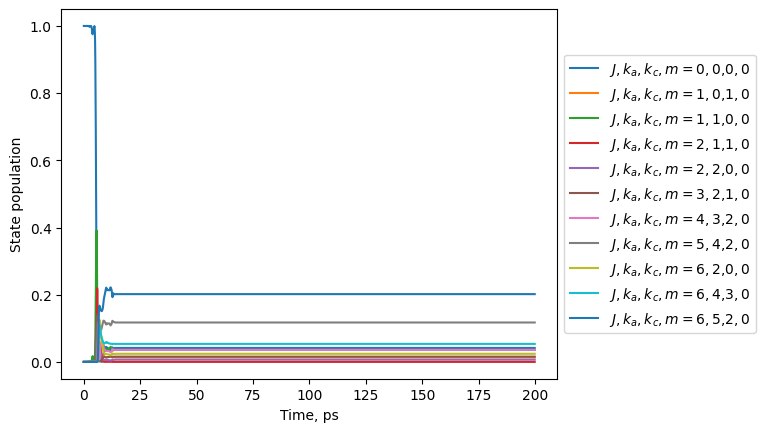

In [14]:
plot_thresh = 1e-1

# extract time grid
time_list = np.array([time for (ind, time, coef) in coefs_time])

# extract populations
populations_time = np.array([np.abs(coef) ** 2 for (ind, time, coef) in coefs_time])

# plot significant populations
for state_ind, population in enumerate(populations_time.T):
    if np.max(population) > plot_thresh:
        label = "$J,k_a,k_c,m=$" + ",".join(
            f"{elem}$" for elem in assignment[state_ind]
        )
        plt.plot(time_list, population, label=label)
plt.xlabel("Time, ps")
plt.ylabel("State population")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.show()

### Evaluate degree of orientation

The degree of orientation is defined by the expectation value of the $\cos\beta$ function:

$$
\langle\psi(t) |\cos\theta|\psi(t)\rangle,
$$

where $\theta$ is the angle between the dipole moment vector in the molecular frame and the field polarisation axis in the laboratory frame, and $\psi(t)$ is the rotational wavepacket.
Note, the rotational wavepacket is also a function of three Euler angles: $\alpha$, $\beta$, and $\gamma$.
For shortness, these variables are skipped in our notation.

To compute the expectation value, we can employ a Monte Carlo method. This approach involves approximating the integral that represents the expectation value as a sum over a discrete set of points that are sampled based on the density. Specifically, the expectation value can be approximated as follows:

$$
\langle\psi(t) |\cos\theta|\psi(t)\rangle = \int \psi^*(t)\psi(t) \cos\theta d\alpha d\beta\sin\beta d\gamma =  \int \rho(t) \cos\theta d\alpha d\beta d\gamma
\approx \sum_{\{\alpha_g,\beta_g,\gamma_g\} \sim \rho(t)}^{N_g} \cos\theta(\alpha_g,\beta_g,\gamma_g),
$$

where $\rho(t) = \psi^*(t)\psi(t)\sin\beta$ is introduced as the rotational density function.

Extending this approach, we can map the discretely sampled Euler angles $\{\alpha_g,\beta_g,\gamma_g\}_g^{N_g}$,
which are distributed according to the rotational density $\rho(t)$, to the elements of the direction-cosine
rotation matrix $R{(3\times 3)}$ that rotates a vector from the molecular to the laboratory frame.
Each set of Euler angles generates a corresponding rotation matrix $R_g = R(\alpha_g,\beta_g,\gamma_g)$.
This allows us to evaluate how distributions in the molecular frame transform to the laboratory frame,
and compute any related matrix elements.

For instance, to calculate the matrix element of $\cos\theta$ for OCS, with the dipole moment vector aligned along the molecular $z$ axis and the external field polarisation aligned along the laboratory $Z$ axis, we use the following approximation:

$$
\langle\psi(t) |\cos\theta|\psi(t)\rangle \approx \sum_{\{\alpha_g,\beta_g,\gamma_g\} \sim \rho(t)}^{N_g} \cos\theta(\alpha_g,\beta_g,\gamma_g)
= \sum_{\{\alpha_g,\beta_g,\gamma_g\} \sim \rho(t)}^{N_g} [R_g\cdot (0, 0, 1)]_Z,
$$

where $[..]_Z$ means that we take only the third component of the resulting dot product, corresponding to the $Z$ projection.

In practice, the process begins by understanding the composition of the rotational wavepacket, which is expressed
as a linear combination of rotational wavefunctions:

$$
\psi(t) = \sum_{J,k_a,k_c,m} c_{J,k_a,k_c,m}(t) \phi_{J,k_a,k_c,m},
$$

with time-dependent coefficients $c(t)$ obtained from the solution of the TDSE, for example, using `tdse.propagate`.

Rotational wavefunctions are in turn eigenfunctions of the field-free rotational Hamiltonian.
They are expressed as linear combinations of symmetric-top functions:

$$
\phi_{J,k_a,k_c,m} = \sum_{k_a,k_c} c_{k_a,k_c}^{(J,m)}|J,k_a,k_c,m\rangle.
$$

The functions $\phi_{J,k_a,k_c,m}$ depend on the three Euler angles $\alpha$, $\beta$, and $\gamma$.
The eigenfunction coefficients $c_{k_a,k_c}^{(J,m)}$ together with the values of rotational wavefunctions $\phi_{J,k_a,k_c,m}$ on a grid of Euler angle values are calculated by `field_free.field_free` or `field_free.field_free_linear` functions, as we did it in the cells above.

In [15]:
# grid of Euler angles, as output by `field_free_linear`
alpha, beta, gamma = grid
no_grid_points = len(alpha) * len(beta) * len(gamma)  # total number of grid points
print("total number of points in Euler grid:", no_grid_points)

# arrange field-free rotational wavefunctions on grid in the same order of functions (quantum numbers)
# as used for the field-free and dipole matrix elements
func_on_grid = np.concatenate(
    [rot_func_on_grid[j].reshape(-1, no_grid_points) for j in range(max_j + 1)], axis=0
)

total number of points in Euler grid: 27000


After obtaining the rotational wavefunctions $\phi_{J,k_a,k_c,m}$ evaluated on a grid on Euler angles and stored in the array `func_on_grid`, the next step is to calculate the values of the time-dependent wavepacket $\psi(t)$ on the same grid.
The wavepacket is represented by $\psi(t) = \sum_{J,k_a,k_c,m} c_{J,k_a,k_c,m}(t) \phi_{J,k_a,k_c,m}$, where $c_{J,k_a,k_c,m}(t)$ are the time-dependent coefficients that have been computed previously using the `tdse.propagate` function. These coefficients are stored in a collection named `coefs_time`.
To evaluate $\psi(t)$ on the grid, we essentially need to perform the dot product between the coefficients and the wavefunctions, evaluated at each point on the grid and each time point $t$.


In [16]:
# extract wavepacket coefficients
coefs = np.array([coef for (ind, time, coef) in coefs_time])

# compute wavepacket on grid of Euler angles
wavepack_on_grid = np.dot(func_on_grid.T, coefs.T)

print(wavepack_on_grid.shape) # shape = (no_grid_points, no_time_steps)

(27000, 2000)


Now, evaluate the time-dependent rotational density function $\rho(t) = \psi^*(t)\psi(t)\sin\beta$ and store it in `dens_on_grid`

In [17]:

dens_on_grid = wavepack_on_grid * np.conj(wavepack_on_grid)
dens_on_grid = dens_on_grid.real

# reshape density from a 3D direct product grid to the three 1D nested grids
dens_on_grid = dens_on_grid.reshape(len(alpha), len(beta), len(gamma), -1)

# multiply by spherical volume element \sin\beta
sin_beta = np.sin(beta)
dens_on_grid *= sin_beta[None, :, None, None]

print(dens_on_grid.shape) # shape = (len(alpha), len(beta), len(gamma), no_time_steps)

(30, 30, 30, 2000)


#### Monte-Carlo procedure

Generate dicrete samples of Euler angles according to the rotational density, in `dens_on_grid`, and map them into the elements of the direction-cosine rotation matrix.

In [18]:
dens_interpolate = RegularGridInterpolator((alpha, beta, gamma), dens_on_grid)
max_dens = np.max(dens_on_grid, axis=(0, 1, 2))

# generate uniformly-distributed samples of Euler angles
npoints_sample = 100000
euler_sample_points = np.random.uniform(
    low=[0, 0, 0], high=[2 * np.pi, np.pi, 2 * np.pi], size=(npoints_sample, 3)
)

# evaluate density on the samples and apply rejection sampling
dens = dens_interpolate(euler_sample_points) / max_dens
eta = np.random.uniform(0.0, 1.0, size=len(dens))
euler_sample_points = [euler_sample_points[np.where(d > eta)] for d in dens.T]

# note, different elements in the list `euler_sample_points` correspond to different time steps

# map samples of Euler angles to samples of direction-cosine rotation matrix
rotation_matrix = [
    Rotation.from_euler("zyz", points).as_matrix() for points in euler_sample_points
]

# note, different elements in the list `rotation_matrix` correspond to different time steps

# inspect shape, for example, for time_step=0
time_step = 0
print(rotation_matrix[time_step].shape) # shape = (no_sample_points, 3, 3)

(63739, 3, 3)


And finally, evaluate expectation values of desired functions of Euler angles, e.g., $\cos\theta$.

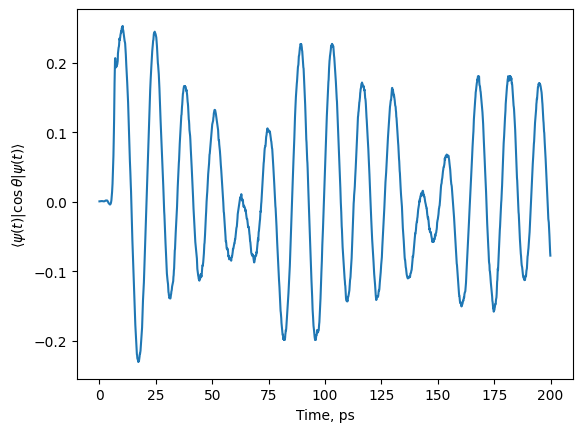

In [19]:
mol_vector = [0, 0, 1]
lab_vector = [np.dot(rot, mol_vector) for rot in rotation_matrix]

cos_theta = np.array([np.mean(vec[:, 2]) for vec in lab_vector])

plt.plot(time_list, cos_theta)
plt.xlabel('Time, ps')
plt.ylabel('$\\langle \\psi(t)|\\cos\\theta|\\psi(t)\\rangle$')
plt.show()

### Analytic evaluation of the degree of orientation

The matrix elements of some of functions of Euler angles can be evaluated analytically, similarly to the dipole moment matrix elements.

Here, we use analytic implementation of the $\langle \phi_{J',k_a',k_c',m'} |\cos\beta| \phi_{J,k_a,k_c,m}\rangle$ matrix elements, implemented in `stark.costheta_me_matrix`,
and compare it with the resutls of Monte-Carlo simulations.

In [20]:
from stark import costheta_me_matrix

# matrix elements <cos(beta)> in rotational field-free basis
costheta_matrix = costheta_me_matrix(max_j, rot_vec, linear=False)

# extract wavepacket coefficients
coefs = np.array([coef for (ind, time, coef) in coefs_time])  # (time, bas)

# transform matrix <cos(beta)> to wavepacket representation
costheta_time = np.einsum(
    "ti,kij,tj->t", np.conj(coefs), costheta_matrix, coefs, optimize="optimal"
)

# check if values are real
print("maximal imaginary component in <cos(beta)> (expected small):", np.max(np.abs(costheta_time.imag)))
costheta_time = costheta_time.real

maximal imaginary component in <cos(beta)> (expected small): 4.6891743959998067e-17


Plot results and compare with Monte-Carlo values.

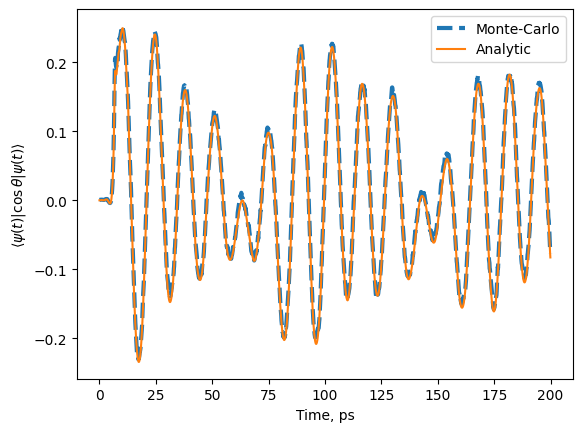

In [21]:
plt.plot(time_list, cos_theta, label="Monte-Carlo", linestyle='--', linewidth=3)
plt.plot(time_list, costheta_time, label="Analytic")
plt.xlabel('Time, ps')
plt.ylabel('$\\langle \\psi(t)|\\cos\\theta|\\psi(t)\\rangle$')
plt.legend()
plt.show()